In [2]:
#Using pandas for loading the csv file into a dataframe
import pandas as pd

#Using matplotlib library for basic graph plotting
import matplotlib.pyplot as plt

#Using seaborn library that allows us to optimize matplotlib's output
import seaborn as sns

In [4]:
#Loading the csv file into the pandas dataframe
diabetes = pd.read_csv('diabetes2.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:xlabel='Insulin', ylabel='BMI'>

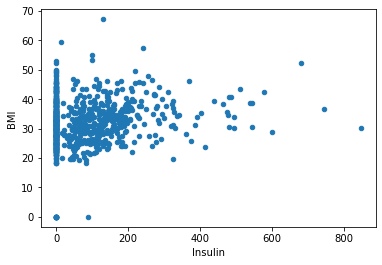

In [14]:
#Generating 3 data visualizations
diabetes.plot(kind='scatter', x = 'Insulin', y = 'BMI')

<AxesSubplot:xlabel='Outcome'>

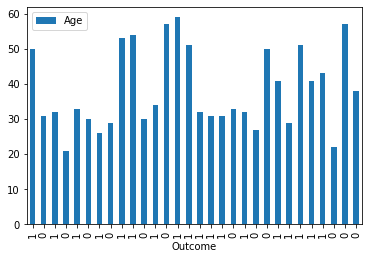

In [15]:
diabetes.head(30).plot(kind='bar', x = 'Outcome', y = 'Age')

<AxesSubplot:ylabel='Density'>

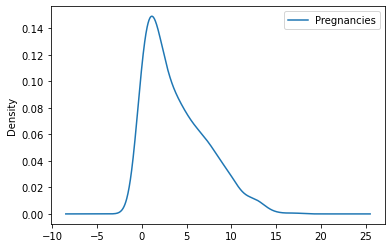

In [11]:
diabetes.plot(kind='kde', x = 'Glucose', y = 'Pregnancies')

In [16]:
#Finding how many Nans in the dataset
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
#Splitting the dataset into features and targets
y = diabetes[['Outcome']]
X = diabetes[['BMI', 'BloodPressure']]

In [20]:
#Splitting the dataset into training and test sets in the ratio 70/30
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [23]:
#Creating a Linear Regression Model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

#Training the Linear Regression model using the training data
lr.fit(X_train, y_train)

C:\Users\yaelr\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [26]:
#Make predictions using your test data
y_pred = lr.predict(X_test)

In [27]:
#Generating the confusion matrix using scikit-learn's confusion matrix method
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[130,  14],
       [ 65,  22]], dtype=int64)

In [28]:
#Generate Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77       144
           1       0.61      0.25      0.36        87

    accuracy                           0.66       231
   macro avg       0.64      0.58      0.56       231
weighted avg       0.65      0.66      0.61       231

